Pre Meditation and Post Meditation Analysis

In [1]:
import brainsurf.data.mff as input_load

In [2]:
suriya_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/BS.mff")
suriya_meditation = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/M1.mff")
suriya_transmission = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/T1.mff")
suriya_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/P1.mff")


Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\M1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\T1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\P1.mff...
    Reading events ...
    Assembling measurement info ...


In [3]:
suriya_baseline.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E121,E122,E123,E124,E125,E126,E127,E128,Vertex Reference,sec
0,-0.012650,-0.006606,0.002758,0.002042,0.000380,0.001469,0.004418,-0.017802,-0.013326,0.008499,...,-0.013461,-0.009211,-0.003504,0.002472,-0.020046,-0.016379,-0.015446,-0.017229,0.0,0.000
1,-0.012611,-0.006578,0.002774,0.002052,0.000384,0.001460,0.004402,-0.017772,-0.013299,0.008510,...,-0.013424,-0.009178,-0.003483,0.002486,-0.020009,-0.016357,-0.015425,-0.017193,0.0,0.004
2,-0.012550,-0.006531,0.002812,0.002086,0.000413,0.001455,0.004396,-0.017716,-0.013255,0.008542,...,-0.013362,-0.009119,-0.003441,0.002525,-0.019946,-0.016304,-0.015388,-0.017120,0.0,0.008
3,-0.012563,-0.006539,0.002816,0.002097,0.000427,0.001462,0.004409,-0.017721,-0.013259,0.008552,...,-0.013376,-0.009128,-0.003443,0.002531,-0.019949,-0.016318,-0.015384,-0.017133,0.0,0.012
4,-0.012594,-0.006560,0.002799,0.002082,0.000416,0.001462,0.004414,-0.017746,-0.013280,0.008537,...,-0.013406,-0.009157,-0.003462,0.002513,-0.019976,-0.016339,-0.015397,-0.017180,0.0,0.016


# Sampling Frequency Cailculation


In [4]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(suriya_baseline['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

250.0


# Statistial Comparision

In [5]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30
sampling_freq= 250

In [7]:
import brainsurf.preprocessing.filtering as filter
import brainsurf.analysis.stats_analysis as stats
meditator_bandpass_filtered_eeg = filter.butter_bandpass_filter(suriya_baseline['E2'], lowcut,highcut , sampling_freq, order) 
novice_bandpass_filtered_eeg = filter.butter_bandpass_filter(suriya_post['E2'], lowcut,highcut , sampling_freq, order) 

In [8]:
meditator_mean=stats.calculate_mean(meditator_bandpass_filtered_eeg)
print(meditator_mean)
novice_mean = stats.calculate_mean(novice_bandpass_filtered_eeg)
print(novice_mean)

3.966743740066636e-09
8.229126654929715e-09


In [9]:
meditator_std=stats.calculate_std(meditator_bandpass_filtered_eeg)
print(meditator_std)
novice_std = stats.calculate_std(novice_bandpass_filtered_eeg)
print(novice_std)

0.00012718174054892999
0.00019491589497601229


In [10]:
meditator_varience=stats.calculate_variance(meditator_bandpass_filtered_eeg)
print(meditator_varience)
novice_varience = stats.calculate_variance(novice_bandpass_filtered_eeg)
print(novice_varience)

1.617519512905534e-08
3.799220611429985e-08


In [11]:
meditator_skw=stats.calculate_skewness(meditator_bandpass_filtered_eeg)
print(meditator_skw)
novice_skw = stats.calculate_skewness(novice_bandpass_filtered_eeg)
print(novice_skw)

-10.674467161754208
-11.321480742673495


In [12]:
meditator_kurtosis=stats.calculate_kurtosis(meditator_bandpass_filtered_eeg)
print(meditator_kurtosis)
novice_kurtosis = stats.calculate_kurtosis(novice_bandpass_filtered_eeg)
print(novice_kurtosis)

719.9637401115542
773.7309833263871


### Inference
please write down what the inference is

In [13]:
def calculate_cohens_d(x1, x2):
    # Calculate the means and standard deviations of the two samples
    mean1, mean2 = np.mean(x1), np.mean(x2)
    std1, std2 = np.std(x1, ddof=1), np.std(x2, ddof=1)

    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((len(x1) - 1) * std1 ** 2 + (len(x2) - 1) * std2 ** 2) / (len(x1) + len(x2) - 2))

    # Calculate Cohen's d
    cohens_d = (mean1 - mean2) / pooled_std

    return cohens_d

def compare_eeg_datax(df1, df2):
    # Select only the EEG channels (E1 to E128) and exclude unnecessary columns
    eeg_columns = df1.columns[:-2]  # Assuming the first two columns are time and vertices
    df1 = df1[eeg_columns]
    df2 = df2[eeg_columns]

    # Create an empty DataFrame to store the statistics
    result_df = pd.DataFrame(index=eeg_columns)

    # Calculate mean and variance for each channel
    result_df['Mean_df1'] = df1.mean()
    result_df['Mean_df2'] = df2.mean()
    result_df['Variance_df1'] = df1.var()
    result_df['Variance_df2'] = df2.var()

    # Calculate standard deviation for each channel
    result_df['Standard Deviation_df1'] = df1.std()
    result_df['Standard Deviation_df2'] = df2.std()

    # Calculate t-test and effect size (Cohen's d) for each channel
    ttest_results = []
    effect_sizes = []
    for column in eeg_columns:
        t, p = ttest_ind(df1[column], df2[column])
        ttest_results.append(t)
        d = calculate_cohens_d(df1[column], df2[column])
        effect_sizes.append(d)
    result_df['T-test'] = ttest_results
    result_df['Effect Size'] = effect_sizes

    # Calculate ANOVA for each channel
    anova_results = []
    for column in eeg_columns:
        f, p = f_oneway(df1[column], df2[column])
        anova_results.append(f)
    result_df['ANOVA'] = anova_results

    return result_df


In [14]:
def visualize_comparison(comparison_result):
    # Extract the channels as the x-axis labels
    channels = comparison_result.index

    # Get the mean, variance, standard deviation, t-test, ANOVA, and effect size values
    mean_df1 = comparison_result['Mean_df1']
    mean_df2 = comparison_result['Mean_df2']
    variance_df1 = comparison_result['Variance_df1']
    variance_df2 = comparison_result['Variance_df2']
    std_df1 = comparison_result['Standard Deviation_df1']
    std_df2 = comparison_result['Standard Deviation_df2']
    ttest_df = comparison_result['T-test']
    anova_df = comparison_result['ANOVA']
    effect_size_df = comparison_result['Effect Size']

    plt.figure(figsize=(18, 10))

    plt.subplot(2, 3, 1)
    plt.plot(channels, mean_df1, label='df1', marker='o')
    plt.plot(channels, mean_df2, label='df2', marker='o')
    plt.title('Mean Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Mean')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting variance values
    plt.subplot(2, 3, 2)
    plt.plot(channels, variance_df1, label='df1', marker='o')
    plt.plot(channels, variance_df2, label='df2', marker='o')
    plt.title('Variance Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Variance')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting standard deviation values
    plt.subplot(2, 3, 3)
    plt.plot(channels, std_df1, label='df1', marker='o')
    plt.plot(channels, std_df2, label='df2', marker='o')
    plt.title('Standard Deviation Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=90)
    plt.legend()

    # Plotting t-test results
    plt.subplot(2, 3, 4)
    plt.plot(channels, ttest_df, marker='o')
    plt.title('T-test Comparison')
    plt.xlabel('Channels')
    plt.ylabel('T-test')
    plt.xticks(rotation=90)

    # Plotting ANOVA results
    plt.subplot(2, 3, 5)
    plt.plot(channels, anova_df, marker='o')
    plt.title('ANOVA Comparison')
    plt.xlabel('Channels')
    plt.ylabel('ANOVA')
    plt.xticks(rotation=90)

    # Plotting effect size results
    plt.subplot(2, 3, 6)
    plt.plot(channels, effect_size_df, marker='o')
    plt.title('Effect Size Comparison')
    plt.xlabel('Channels')
    plt.ylabel('Effect Size')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

## Comparision between BASELINE AND POST

In [15]:
# Call the function to compare the EEG data
comparison_result = compare_eeg_datax(suriya_baseline, suriya_post)
print(comparison_result.head())

    Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1 -0.012968 -0.017287  2.358705e-08  1.091223e-08                0.000154  \
E2 -0.006689 -0.009872  2.707744e-08  6.840597e-08                0.000165   
E3  0.003093  0.004706  3.786793e-08  3.246320e-08                0.000195   
E4  0.002382  0.004456  3.308424e-08  1.161044e-07                0.000182   
E5  0.000636  0.005120  1.465239e-08  1.259507e-07                0.000121   

    Standard Deviation_df2       T-test  Effect Size         ANOVA  
E1                0.000104  6367.840703    32.883388  4.054940e+07  
E2                0.000262  2821.457783    14.569945  7.960624e+06  
E3                0.000180 -1665.399289    -8.600085  2.773555e+06  
E4                0.000341 -1470.732098    -7.594828  2.163053e+06  
E5                0.000355 -3274.938649   -16.911710  1.072522e+07  


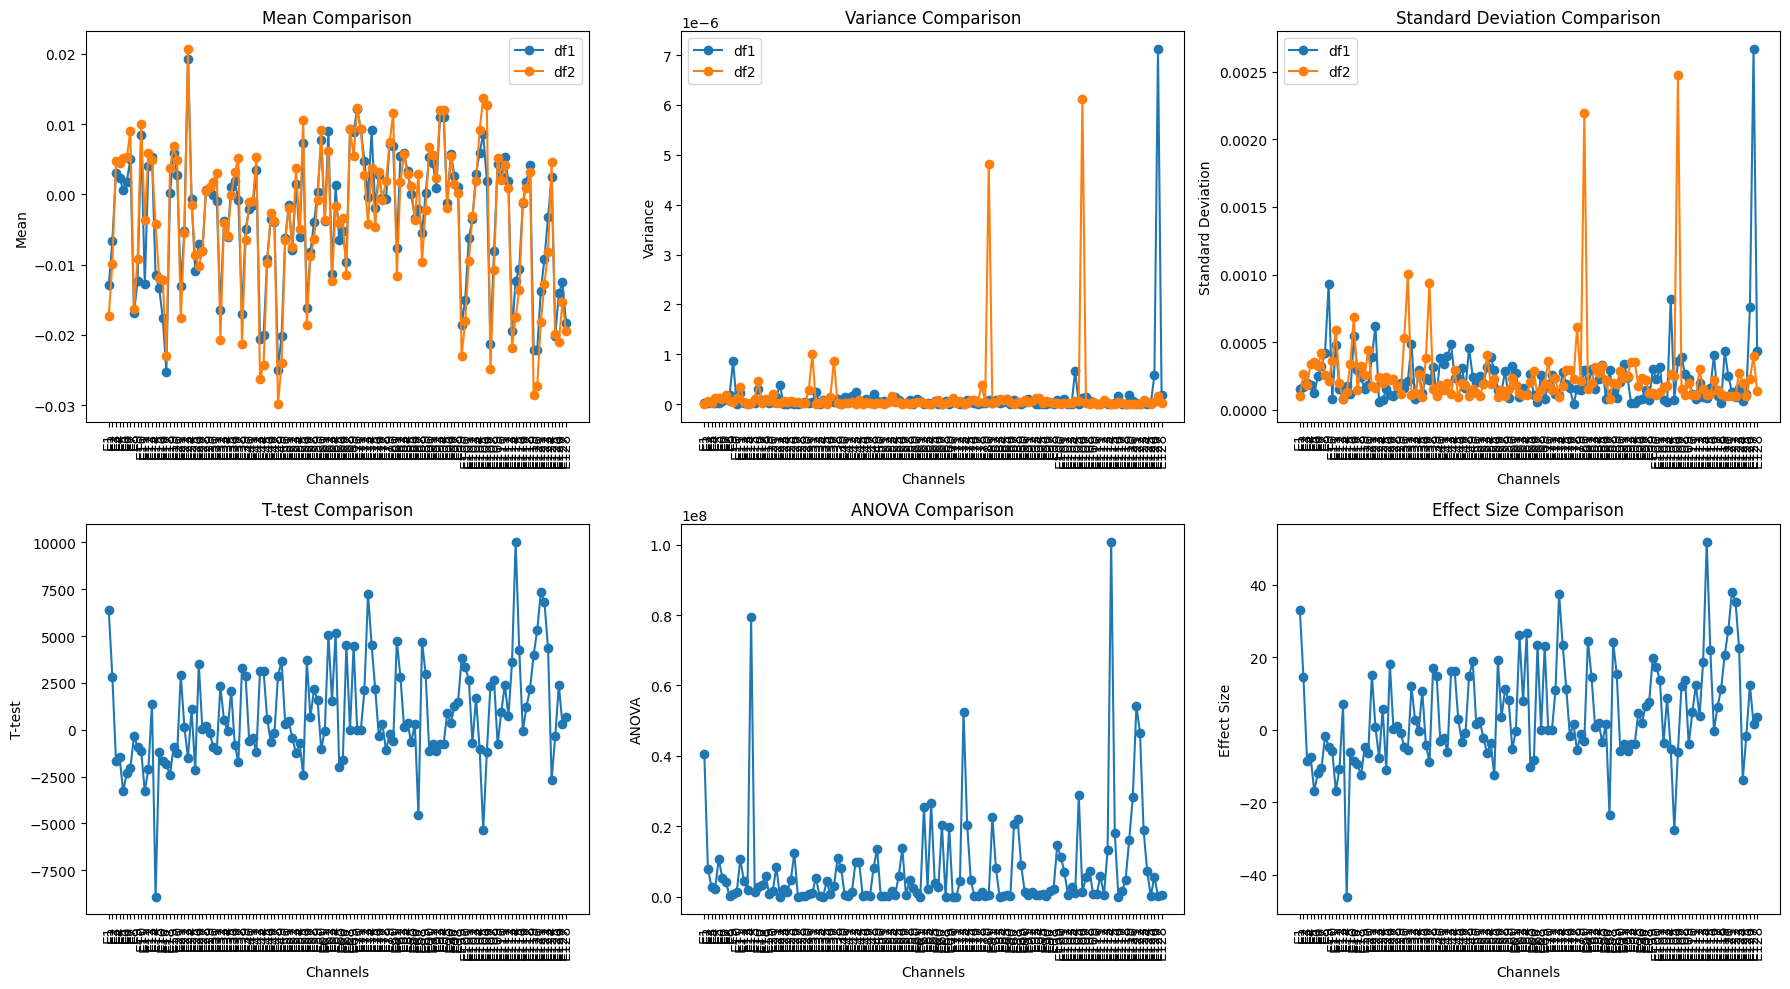

In [16]:
visualize_comparison(comparison_result)

## Comparision between Meditation and Transmission

In [17]:
# Call the function to compare the EEG data
comparison_types = compare_eeg_datax(suriya_meditation, suriya_transmission)
print(comparison_types.head())

    Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1 -0.015460 -0.014214  1.640918e-07  1.244471e-07                0.000405  \
E2 -0.009783 -0.008584  8.905009e-08  1.651796e-07                0.000298   
E3  0.004164  0.003932  5.327511e-09  1.065619e-08                0.000073   
E4  0.003369  0.003231  4.392898e-09  8.426567e-09                0.000066   
E5  0.003122  0.001688  1.611434e-07  1.213146e-07                0.000401   

    Standard Deviation_df2      T-test  Effect Size          ANOVA  
E1                0.000353 -635.395806    -3.281170  403727.830163  
E2                0.000406 -651.022693    -3.361867  423830.546872  
E3                0.000103  501.266841     2.588531  251268.445488  
E4                0.000092  333.475552     1.722060  111205.943465  
E5                0.000348  738.741478     3.814845  545738.970749  


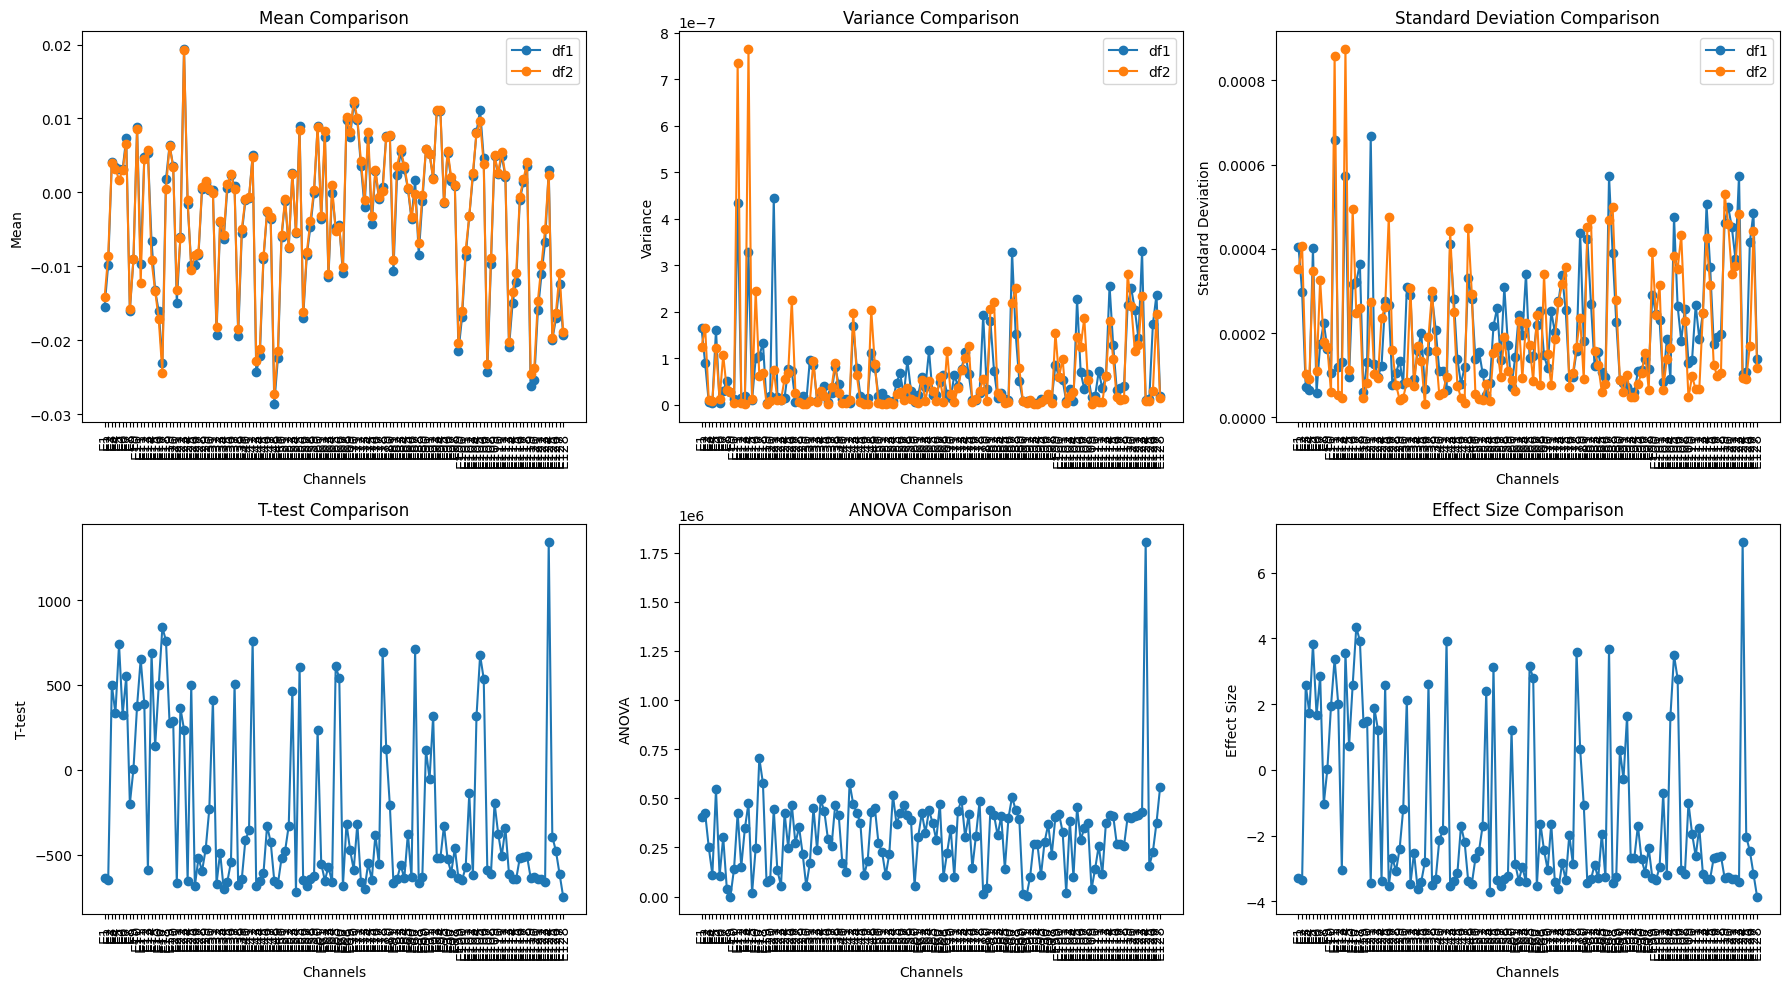

In [18]:
visualize_comparison(comparison_types)

In [19]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30
sampling_freq= 250

In [20]:
import brainsurf.preprocessing.filtering as filter
# suriya_pre = filter.butter_bandpass_filter(suriya_baseline['E2'], lowcut,highcut , sampling_freq, order) 
# suriya_post_filter = filter.butter_bandpass_filter(suriya_post['E2'], lowcut,highcut , sampling_freq, order) 

In [21]:
suriya_pre = suriya_baseline['E2'] 
suriya_post_filter = suriya_post['E2'] 


In [22]:
import brainsurf.analysis.power_spectrum as psd
frequence_bands_pre = psd.extract_frequency_bands(suriya_pre)
frequence_bands_post = psd.extract_frequency_bands(suriya_post_filter)

In [23]:
alpha = frequence_bands_pre['alpha']
beta = frequence_bands_pre['beta']
theta = frequence_bands_pre['theta']
delta = frequence_bands_pre['delta']
pre_bands = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta})


In [24]:
alpha = frequence_bands_post['alpha']
beta = frequence_bands_post['beta']
theta = frequence_bands_post['theta']
delta = frequence_bands_post['delta']
post_bands = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta})

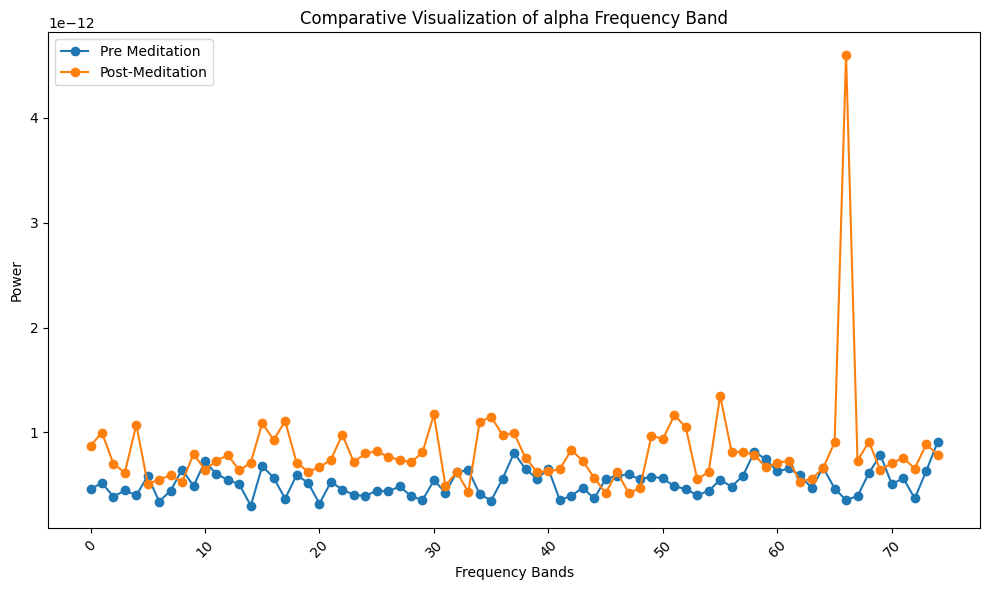

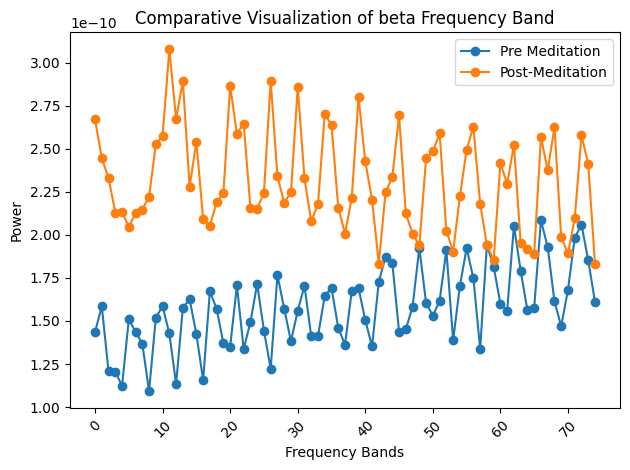

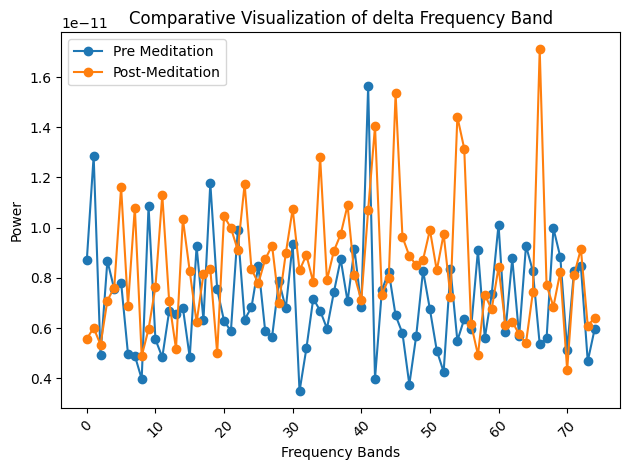

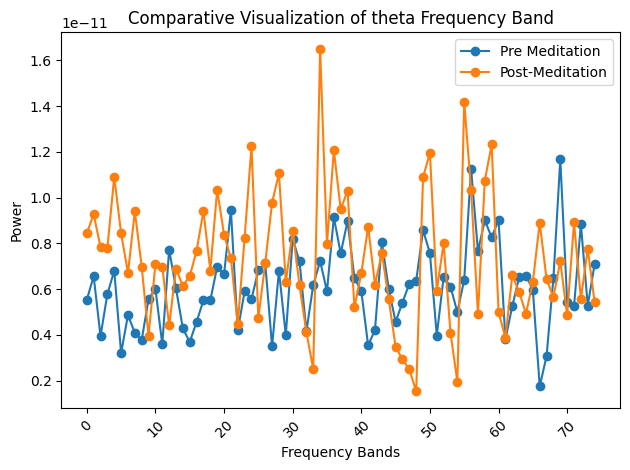

In [25]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate through each frequency band column
for band in pre_bands.columns:
    # Plot the meditators data
    plt.plot(pre_bands.index, pre_bands[band], marker='o', linestyle='-', label='Pre Meditation')

    # Plot the non-meditators data
    plt.plot(post_bands.index, post_bands[band], marker='o', linestyle='-', label='Post-Meditation')

    # Add labels and title
    plt.xlabel('Frequency Bands')
    plt.ylabel('Power')
    plt.title(f'Comparative Visualization of {band} Frequency Band')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


# Multiple Person Tstas analysis

In [26]:
pre_bands['raw'] = suriya_baseline['E2']
post_bands['raw'] = suriya_post['E2']

In [27]:
pre_bands=pre_bands.dropna()
post_bands=post_bands.dropna()
pre_bands.head()


,alpha,beta,delta,theta,raw
0,4.599737e-13,1.436206e-10,8.698741e-12,5.524638e-12,-0.006606
1,5.149563e-13,1.585564e-10,1.285703e-11,6.563979e-12,-0.006578
2,3.865521e-13,1.208412e-10,4.929813e-12,3.941943e-12,-0.006531
3,4.444587e-13,1.205339e-10,8.686255e-12,5.776731e-12,-0.006539
4,3.993090e-13,1.123073e-10,7.549027e-12,6.797122e-12,-0.006560


In [28]:
print(len(post_bands))

75


In [29]:
# change the location of function
import brainsurf.cognitive_analysis_module.cognitive_comparision as stats
stats_suriya = stats.compare_eeg_data_stats(pre_bands,post_bands)
stats_suriya

,Feature,T-Stat,P-Value (T-Test),F-Stat,P-Value (ANOVA),Effect Size
0,EEG,347.964605,1.695332e-217,121079.366341,1.695332e-217,154.484769
1,Alpha,-5.061798,1.215769e-06,25.621802,1.215769e-06,2.296711
2,Beta,-17.029095,1.084332e-36,289.990067,1.084332e-36,3.202219
3,Theta,-3.057612,2.648356e-03,9.348989,2.648356e-03,0.639880
4,Delta,-3.569372,4.828707e-04,12.740417,4.828707e-04,0.633684


In [30]:
comparison_result_suriya = compare_eeg_datax(suriya_baseline, suriya_post)
print(comparison_result_suriya)

      Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1   -0.012968 -0.017287  2.358705e-08  1.091223e-08                0.000154  \
E2   -0.006689 -0.009872  2.707744e-08  6.840597e-08                0.000165   
E3    0.003093  0.004706  3.786793e-08  3.246320e-08                0.000195   
E4    0.002382  0.004456  3.308424e-08  1.161044e-07                0.000182   
E5    0.000636  0.005120  1.465239e-08  1.259507e-07                0.000121   
...        ...       ...           ...           ...                     ...   
E124  0.002495  0.004534  3.722335e-09  3.950959e-08                0.000061   
E125 -0.020106 -0.019916  1.418954e-08  1.084897e-08                0.000119   
E126 -0.014123 -0.021036  5.778985e-07  5.140430e-08                0.000760   
E127 -0.012485 -0.015337  7.120301e-06  1.601243e-07                0.002668   
E128 -0.018376 -0.019528  1.912857e-07  1.842016e-08                0.000437   

      Standard Deviation_df2       T-te

In [31]:
satish_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Satish/BS.mff")
satish_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Satish/P1.mff")
comparison_result_satish = compare_eeg_datax(satish_baseline, satish_post)
print(comparison_result_satish)

Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Satish\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Satish\P1.mff...
    Reading events ...
    Assembling measurement info ...
      Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1   -0.004460 -0.002670  2.967288e-07  1.998466e-08                0.000545  \
E2   -0.015096 -0.013032  5.639587e-08  9.386896e-09                0.000237   
E3   -0.020560 -0.019779  2.505380e-07  2.798924e-07                0.000501   
E4   -0.018721 -0.020151  2.768211e-07  9.960391e-09                0.000526   
E5   -0.007721 -0.005287  1.163400e-07  2.024838e-07                0.000341   
...        ...       ...           ...           ...                     ...   
E124 -0.018524 -0.020408  3.177681e-07  5.996654e-08                0.000564   
E125 -0.003164  0.001789  5.692499e-08  4.573383e-08  

In [32]:
rohit_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Rohit/BS.mff")
rohit_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Rohit/P1.mff")
comparison_result_rohit = compare_eeg_datax(rohit_baseline, rohit_post)
print(comparison_result_rohit)

Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Rohit\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Rohit\P1.mff...
    Reading events ...
    Assembling measurement info ...
      Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1   -0.012738 -0.009853  1.492346e-08  2.965326e-08                0.000122  \
E2   -0.010138 -0.010136  2.636861e-07  1.414320e-08                0.000514   
E3   -0.013831 -0.010724  1.615706e-08  1.001500e-08                0.000127   
E4   -0.006843 -0.006152  6.022019e-09  1.520575e-08                0.000078   
E5   -0.001297 -0.000631  4.281359e-08  3.114552e-09                0.000207   
...        ...       ...           ...           ...                     ...   
E124 -0.010883 -0.012640  3.423927e-08  2.347619e-09                0.000185   
E125 -0.019101 -0.011991  7.627068e-07  3.013922e-09    

In [33]:
sunitha_baseline = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Sunitha/BS.mff")
sunitha_post = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Sunitha/P1.mff")
comparison_result_sunitha = compare_eeg_datax(sunitha_baseline, sunitha_post)
print(comparison_result_sunitha)

Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Sunitha\BS.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Sunitha\P1.mff...
    Reading events ...
    Assembling measurement info ...
      Mean_df1  Mean_df2  Variance_df1  Variance_df2  Standard Deviation_df1   
E1   -0.006283 -0.002119  5.627160e-08  4.237194e-08                0.000237  \
E2   -0.000852  0.007001  2.576818e-07  3.105907e-08                0.000508   
E3   -0.007997 -0.004082  8.468435e-09  4.008553e-09                0.000092   
E4   -0.003636  0.001428  9.203793e-08  1.990884e-09                0.000303   
E5   -0.006301 -0.004486  4.811000e-09  8.659039e-10                0.000069   
...        ...       ...           ...           ...                     ...   
E124 -0.008300 -0.005806  8.343471e-09  2.933312e-09                0.000091   
E125 -0.011589 -0.009186  7.313957e-08  2.988473e-08

In [34]:
import pandas as pd

# Assuming you have the following dataframes:
dataframe1 = comparison_result_rohit['T-test']
dataframe2 = comparison_result_sunitha['T-test']
dataframe3 = comparison_result_suriya['T-test']

# Combine the dataframes horizontally
combined_df = pd.concat([dataframe1, dataframe2, dataframe3], axis=1)

# Rename the columns if required
combined_df.columns = ['Rohit T-test', 'Sunitha T-test', 'Suriya T-test']

print(combined_df)


      Rohit T-test  Sunitha T-test  Suriya T-test
E1    -3742.583569    -3630.611906    6367.840703
E2       -1.324063    -4002.276620    2821.457783
E3    -5259.470247    -9600.344651   -1665.399289
E4    -1299.227919    -4522.684918   -1470.732098
E5     -850.962942    -6599.672327   -3274.938649
...            ...             ...            ...
E124   2515.632172    -6433.651447   -2685.421519
E125  -2225.057785    -2050.040574    -329.400898
E126  -1808.564807    -8764.502206    2386.504962
E127  -2490.960839    -1556.496032     289.467182
E128  -2136.929837    -2251.698158     689.083655

[128 rows x 3 columns]


In [35]:
pre_bands['sec'] = suriya_baseline['sec']
post_bands['sec'] = suriya_post['sec']

In [36]:
import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp

cog_idx_before, cog_idx_after= cognitiveComp.calculate_cognitive_indexes(pre_bands, post_bands)


In [37]:
# change the location of function
import brainsurf.cognitive_analysis_module.cognitive_comparision as stats

stats = stats.compare_eeg_data_stats(pre_bands, post_bands)
stats

,Feature,T-Stat,P-Value (T-Test),F-Stat,P-Value (ANOVA),Effect Size
0,EEG,347.964605,1.695332e-217,121079.366341,1.695332e-217,154.484769
1,Alpha,-5.061798,1.215769e-06,25.621802,1.215769e-06,2.296711
2,Beta,-17.029095,1.084332e-36,289.990067,1.084332e-36,3.202219
3,Theta,-3.057612,2.648356e-03,9.348989,2.648356e-03,0.639880
4,Delta,-3.569372,4.828707e-04,12.740417,4.828707e-04,0.633684


In [38]:
import pandas as pd
# Create a dictionary with column names and data
data = {
    'Performance Eval Before': cog_idx_before[0],
    'Arousal Index Before': cog_idx_before[1],
    'Neural Activity Before': cog_idx_before[2],
    'Engagement Before': cog_idx_before[3],
    'Performance Eval After': cog_idx_after[0],
    'Arousal Index After': cog_idx_after[1],
    'Neural Activity After': cog_idx_after[2],
    'Engagement After': cog_idx_after[3]
}
df = pd.DataFrame(data)
df

,Performance Eval Before,Arousal Index Before,Neural Activity Before,Engagement Before,Performance Eval After,Arousal Index After,Neural Activity After,Engagement After
0,312.236604,0.083259,0.098718,0.687986,306.707925,0.103336,0.052234,1.669458
1,307.902678,0.078452,0.122090,0.550589,245.035724,0.107562,0.062257,1.710279
2,312.613069,0.098061,0.073183,0.878024,333.317666,0.089219,0.056366,1.598821
3,271.192691,0.076939,0.119550,0.716211,346.265917,0.078809,0.069749,1.186974
4,281.254091,0.058747,0.127288,0.953293,198.729265,0.098369,0.086440,1.572944
...,...,...,...,...,...,...,...,...
70,333.365639,0.092495,0.062776,1.160377,267.694254,0.145351,0.048392,1.286964
71,353.125715,0.107216,0.067900,0.701648,277.636234,0.084765,0.080883,1.191598
72,559.184659,0.041702,0.083915,1.084739,393.909242,0.117317,0.057005,0.680870
73,294.408481,0.119188,0.053573,1.262800,271.893356,0.114414,0.057200,1.417898


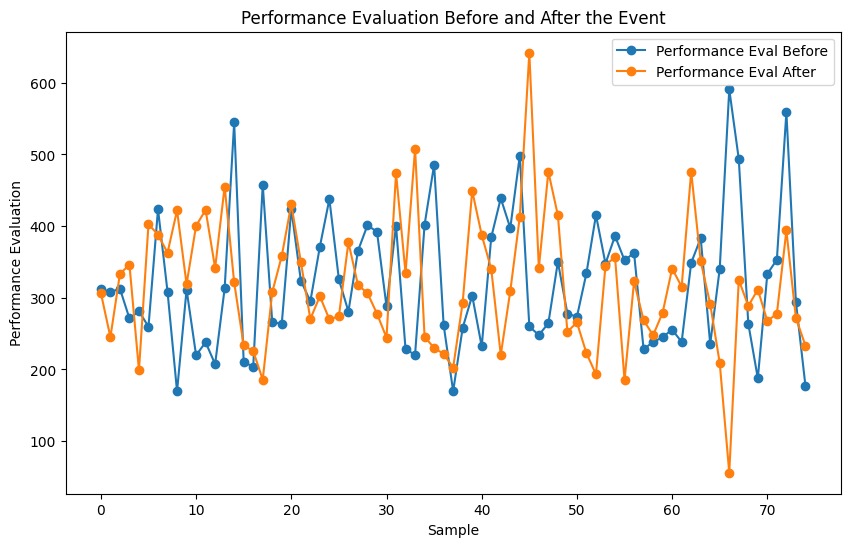

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the variables before and after the event
plt.plot(df.index, df['Performance Eval Before'], marker='o', label='Performance Eval Before')
plt.plot(df.index, df['Performance Eval After'], marker='o', label='Performance Eval After')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Performance Evaluation')
plt.title('Performance Evaluation Before and After the Event')

# Add legend
plt.legend()

# Show the plot
plt.show()

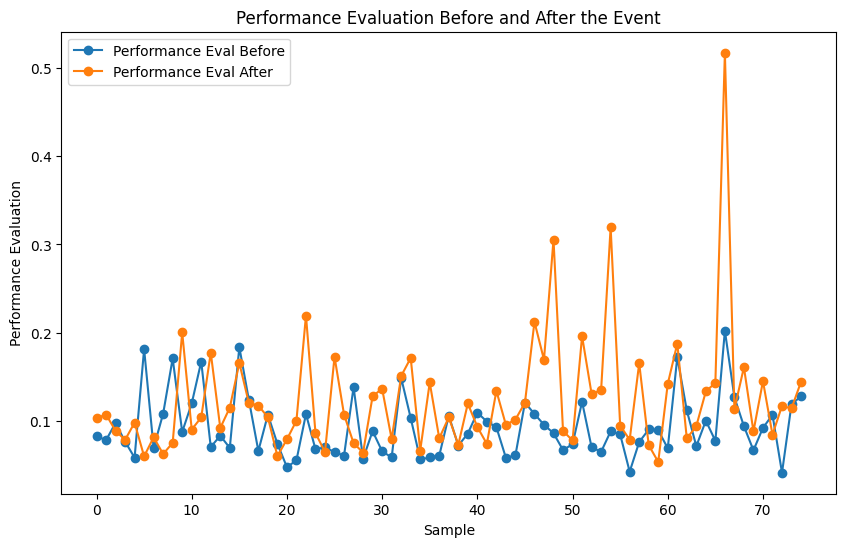

In [40]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the variables before and after the event
plt.plot(df.index, df['Arousal Index Before'], marker='o', label='Performance Eval Before')
plt.plot(df.index, df['Arousal Index After'], marker='o', label='Performance Eval After')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Performance Evaluation')
plt.title('Performance Evaluation Before and After the Event')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [41]:
from scipy import stats

# Perform t-test for 'Arousal Index Before'
arousal_index_before = df['Arousal Index Before']
tstat_arousal_index, pvalue_arousal_index = stats.ttest_rel(arousal_index_before, df['Arousal Index After'])


# Perform t-test for 'Neural Activity Before'
neural_activity_before = df['Neural Activity Before']
tstat_neural_activity, pvalue_neural_activity = stats.ttest_rel(neural_activity_before, df['Neural Activity After'])

# Perform t-test for 'Performance Index'
performance_index = df['Performance Eval Before']
tstat_performance_index, pvalue_performance_index = stats.ttest_rel(performance_index, df['Performance Eval After'])

# Perform t-test for 'Engagement Before'
engagement_before = df['Engagement Before']
tstat_engagement, pvalue_engagement = stats.ttest_rel(engagement_before, df['Engagement After'])

print('P-value for Neural Activity Before:', pvalue_neural_activity)
print('P-value for Performance Index:', pvalue_performance_index)
print('P-value for Engagement Before:', pvalue_engagement)
print('P-value for Arousal Index Before:', pvalue_arousal_index)

P-value for Neural Activity Before: 1.5356296977057824e-05
P-value for Performance Index: 0.831701546791621
P-value for Engagement Before: 0.6394313830036419
P-value for Arousal Index Before: 7.577971180374315e-05
